# Observations and Insights 

1. There's a strong, positive correlation between mouse weight and tumor volume for mice that were treated with Capomulin - correlation factor = 0.84.
Therefore, we are able to create a linear regression equation of: 
y = 0.95x + 21.55. 
We can conclude from this that the heavier the mouse the bigger the tumor will remain, hence, less effective treatment Capomulin is if the mouse is heavier.

2. However, Capomulin as a whole seems to be an effective treatment. 
For mouse "s185", the graph shows the decrease of tumor size as the time went on. On average, the tumor sizes for mice on treatment Capomulin was smaller, on day 45, compared to other treatments.

3. The comparison between the four treatments selected showed Capomulin and Ramicane as more effective than Infubinol and Ceftamin. 
Infubinol seems to be the least ineffective out of the four. Its average and median tumor sizes for mice gettting treated from if was the largest. it also had the highest spread of it's data - standard deviation = 8.602957. And the potential outliers for it's data was a lot more. Therefore, results for the effective of Infubinol can be seen as unreliable.

In [174]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [175]:
# Checking the number of mice.
len(merge_df['Mouse ID'].unique())

249

In [176]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merge_df["Mouse ID"].value_counts()

#merge_df["Timepoint"].unique()

#Timepoints measured for experiment was as follow in days: 
# (0, 5, 10, 15, 20, 25, 30, 35, 40, 45)
#A mouse should only have a maximum count of 10 
#g989 has 13, hence, we presume its data has some duplication

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [177]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_df = merge_df.set_index(["Mouse ID"])
dup_df.loc["g989", "Timepoint"]


Mouse ID
g989     0
g989     0
g989     5
g989     5
g989    10
g989    10
g989    15
g989    15
g989    20
g989    20
g989    25
g989    30
g989    35
Name: Timepoint, dtype: int64

In [178]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = dup_df.drop("g989")
clean_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [179]:
# Checking the number of mice in the clean DataFrame.
len(clean_df)

1880

## Summary Statistics

In [180]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
drug_reg = clean_df.groupby(["Drug Regimen"])

tumor_mean = drug_reg["Tumor Volume (mm3)"].mean()
tumor_mean
tumor_median = drug_reg["Tumor Volume (mm3)"].median()
tumor_median
tumor_var = drug_reg["Tumor Volume (mm3)"].var()
tumor_var
tumor_std = drug_reg["Tumor Volume (mm3)"].std()
tumor_std
tumor_sem = drug_reg["Tumor Volume (mm3)"].sem()
tumor_sem

tumor_df = pd.DataFrame({"Mean": tumor_mean,
                          "Median":tumor_median,
                          "Variance":tumor_var,
                           "Standard Deviation":tumor_std,
                           "Standard Error Mean":tumor_sem})
tumor_df

,Mean,Median,Variance,Standard Deviation,Standard Error Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

In [181]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drug_reg.head()


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
s185,Capomulin,Female,3,17,0,45.000000,0
s185,Capomulin,Female,3,17,5,43.878496,0
s185,Capomulin,Female,3,17,10,37.614948,0
s185,Capomulin,Female,3,17,15,38.177232,0


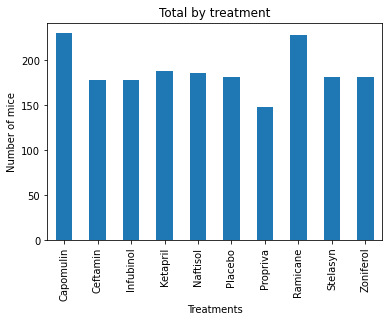

<Figure size 432x288 with 0 Axes>

In [182]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drug_reg.head()
treatment = drug_reg["Drug Regimen"].count()
treatment

treatment_chart = treatment.plot(kind="bar", title="Total by treatment")
treatment_chart.set_xlabel("Treatments")
treatment_chart.set_ylabel("Number of mice")

plt.show()
plt.tight_layout()


In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



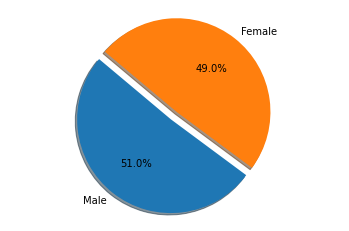

In [183]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = clean_df.value_counts(["Sex"])
labels = ["Male", "Female"]
explode = (0.1, 0)

plt.pie(sex, explode=explode, labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [184]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
timepoint = clean_df.groupby(['Mouse ID'])['Timepoint'].max()
timepoint_df = pd.DataFrame(timepoint)
timepoint_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge2_df = pd.merge(clean_df, timepoint_df, on=('Mouse ID','Timepoint') , how="right")
merge2_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a262,Placebo,Female,17,29,45,70.717621,4
a275,Ceftamin,Female,20,28,45,62.999356,3
a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...
z435,Propriva,Female,12,26,10,48.710661,0
z578,Ramicane,Male,11,16,45,30.638696,0
z581,Infubinol,Female,24,25,45,62.754451,3


In [185]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
cap = []
ram = []
inf = []
cre = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for ind, row in merge2_df.iterrows():
    if row['Drug Regimen'] == treatment[0]:
        cap.append(row['Tumor Volume (mm3)'])
    if row['Drug Regimen'] == treatment[1]:
        ram.append(row['Tumor Volume (mm3)'])
    if row['Drug Regimen'] == treatment[2]:
        inf.append(row['Tumor Volume (mm3)'])
    if row['Drug Regimen'] == treatment[3]:
        cre.append(row['Tumor Volume (mm3)'])

        
        # add subset
treatment_df = pd.DataFrame({'Capomulin': cap,
                            'Ramicane': ram,
                            'Infubinol': inf,
                            'Ceftamin': cre})

treatment_df.describe()    

,Capomulin,Ramicane,Infubinol,Ceftamin
count,25.000000,25.000000,25.000000,25.000000
mean,36.667568,36.191390,58.178246,57.753977
std,5.715188,5.671539,8.602957,8.365568
min,23.343598,22.050126,36.321346,45.000000
25%,32.377357,31.560470,54.048608,48.722078
50%,38.125164,36.561652,60.165180,59.851956
75%,40.159220,40.659006,65.525743,64.299830
max,47.685963,45.220869,72.226731,68.923185


In [186]:
# Determine outliers using upper and lower bounds

#Capomulin outliers
quartiles = treatment_df['Capomulin'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print('(Capomulin Results)')
print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile  is: {upperq}")
print(f"The interquartile range  is: {iqr}")
print(f"The the median is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("------------------------------------")

#Ramicane outliers
quartiles = treatment_df['Ramicane'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print('(Ramicane Results)')
print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile  is: {upperq}")
print(f"The interquartile range  is: {iqr}")
print(f"The the median is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("------------------------------------")

#Infubinol outliers
quartiles = treatment_df['Infubinol'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print('(Infubinol Results)')
print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile  is: {upperq}")
print(f"The interquartile range  is: {iqr}")
print(f"The the median is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("------------------------------------")

#Ceftamin outliers
quartiles = treatment_df['Ceftamin'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print('(Ceftamin Results)')
print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile  is: {upperq}")
print(f"The interquartile range  is: {iqr}")
print(f"The the median is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

(Capomulin Results)
The lower quartile is: 32.37735684
The upper quartile  is: 40.1592203
The interquartile range  is: 7.781863460000004
The the median is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
------------------------------------
(Ramicane Results)
The lower quartile is: 31.56046955
The upper quartile  is: 40.65900627
The interquartile range  is: 9.098536719999998
The the median is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
------------------------------------
(Infubinol Results)
The lower quartile is: 54.04860769
The upper quartile  is: 65.52574285
The interquartile range  is: 11.477135160000003
The the median is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
------------------------------------
(Ceftamin Results)
The lower quartile is: 48.72207785
The upper quartile  is: 64.29983003
Th

Text(0.5, 0, 'Drug Regimen')

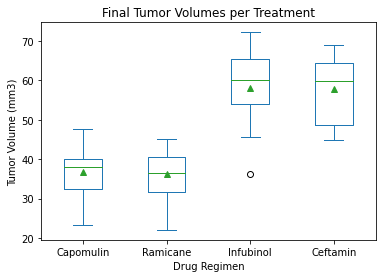

In [220]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
treatment_df.plot(kind="box", showmeans=True)

plt.title('Final Tumor Volumes per Treatment')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel("Drug Regimen")


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

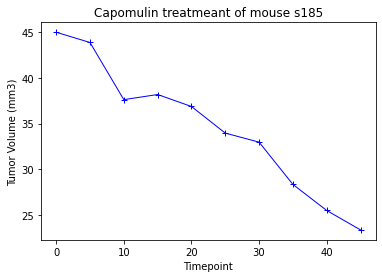

In [221]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
s185_df = merge_df.loc[merge_df['Mouse ID'] == "s185",:]
s185_df
x_axis = s185_df['Timepoint']
y_axis = s185_df['Tumor Volume (mm3)']
s185_df, = plt.plot(x_axis, y_axis, marker="+",color="blue", linewidth=1, label="s185")
plt.title('Capomulin treatmeant of mouse s185')
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Avg. Tumor Volume (mm3)')

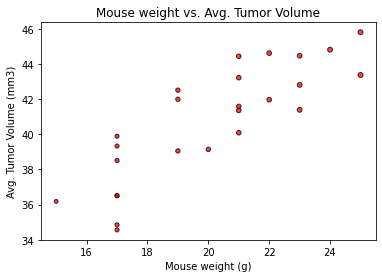

In [222]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin_df = merge_df.loc[merge_df['Drug Regimen'] == "Capomulin",:]
Capomulin_df.set_index("Drug Regimen")

capavg = Capomulin_df.groupby(['Mouse ID']).mean()
capavg

x_weight = capavg['Weight (g)']
y_tv = capavg['Tumor Volume (mm3)']

plt.scatter(x_weight, y_tv, marker="o", facecolors="red", edgecolors="black",
            s=capavg['Weight (g)'], alpha=0.75)
plt.title("Mouse weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Avg. Tumor Volume (mm3)")

## Correlation and Regression

The correlation between both factors is 0.84
Linear regression: y = 0.95x + 21.55


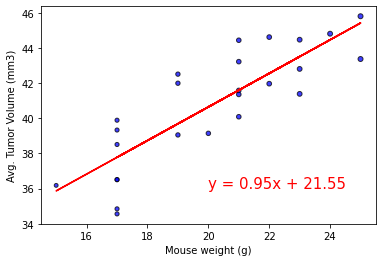

In [223]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(x_weight,y_tv)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_weight, y_tv)
regress_values = x_weight * slope + intercept
print(f"Linear regression: y = {str(round(slope,2))}x + {str(round(intercept,2))}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_weight, y_tv, marker="o", facecolors="blue", edgecolors="black",
            s=x_weight, alpha=0.75)
plt.plot(x_weight,regress_values,"r-")
plt.xlabel('Mouse weight (g)')
plt.ylabel('Avg. Tumor Volume (mm3)')
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.show()
